In [75]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

In [76]:
#Loading Data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [77]:
#Getting list of missing columns
miss_cols_train = train.columns[train.isnull().any()]
miss_cols_test = test.columns[test.isnull().any()]

In [78]:
#Percentage of missing values in descending order
miss = (train[miss_cols_train].isnull().sum()/len(train)).sort_values(ascending=False)
print(miss)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


In [79]:
#Columns to drop - all columns with more than 15% values missing
drop_cols = list(miss[miss>0.15].index.values)
drop_cols.append('MasVnrArea')
print(drop_cols)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MasVnrArea']


In [80]:
#separating numeric and categorical variables
numeric_data = train._get_numeric_data()
cat_data = train.select_dtypes(include=['object'])

print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))
del numeric_data['Id']

There are 38 numeric and 43 categorical columns in train data


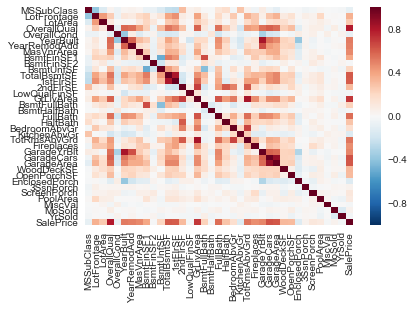

In [81]:
#Correlation matrix
corr = numeric_data.corr()
sns.heatmap(corr)

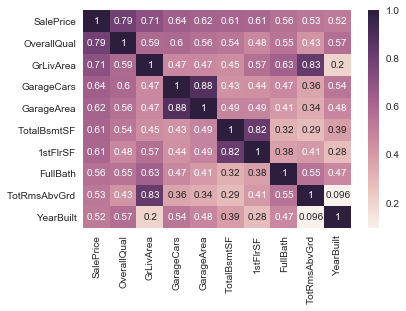

In [82]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols_corr = corr.nlargest(k, 'SalePrice').index
sns.heatmap(train[cols_corr].corr(),annot=True)

In [83]:
#Columns to drop - columns which have high correlation with other columns
drop_cols.extend(['GarageArea','TotRmsAbvGrd','1stFlrSF','GarageYrBlt'])
print(drop_cols)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt']


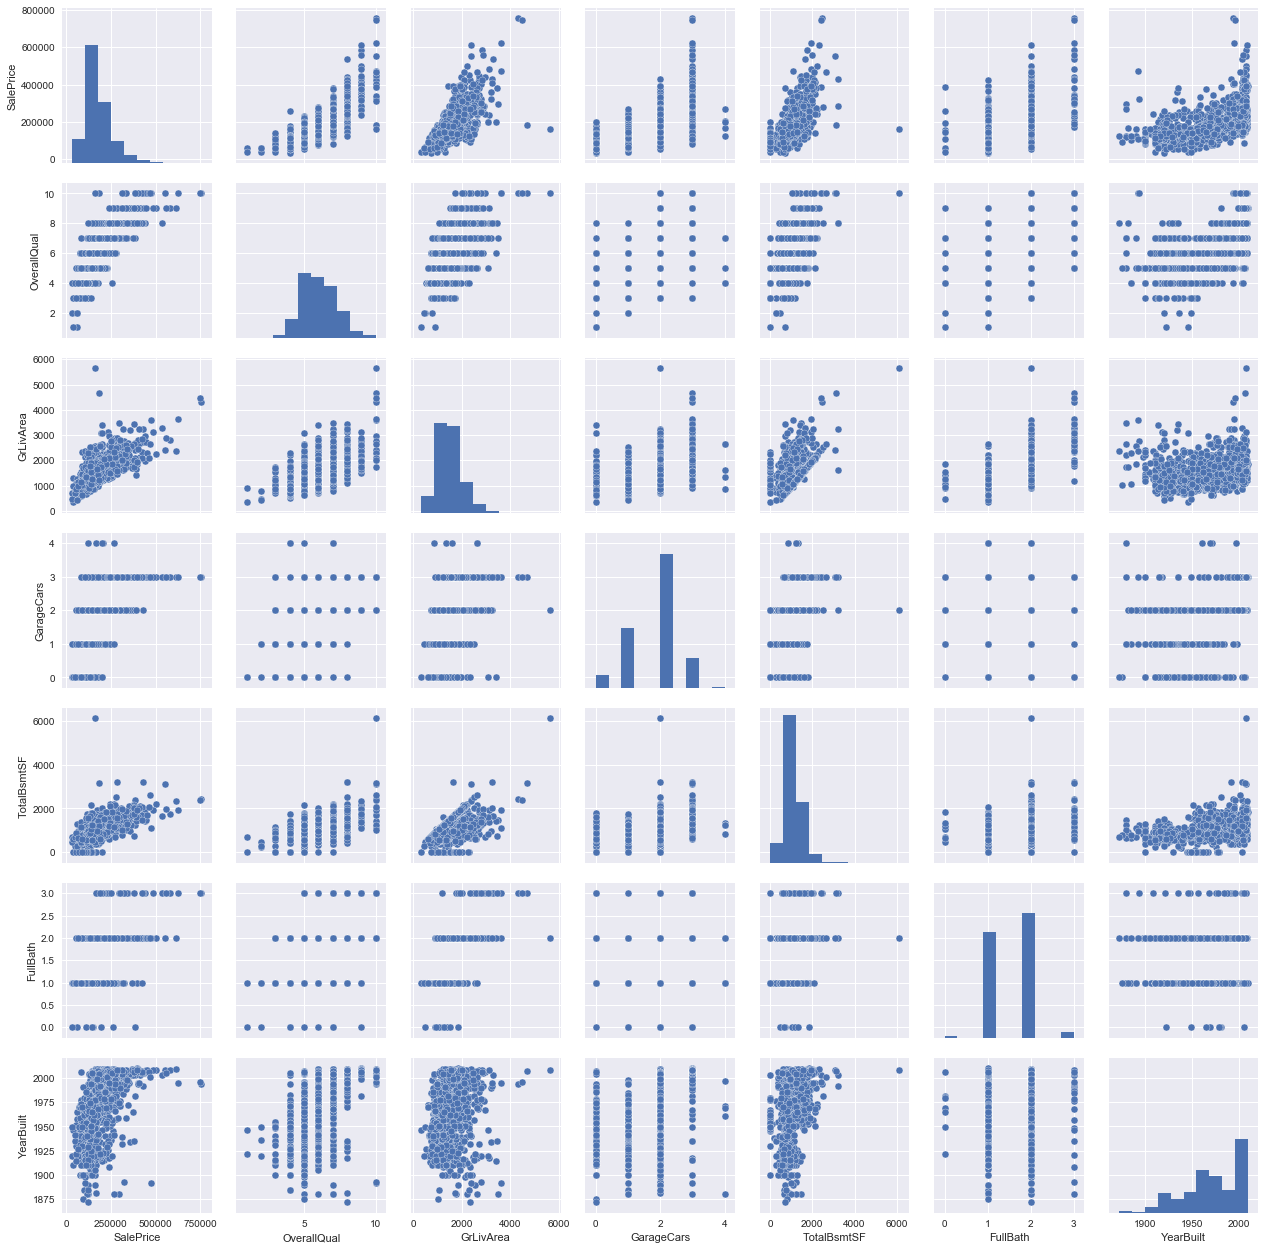

In [84]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

In [85]:
train[train['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [86]:
#Handling missing values
print(train.shape)
train.drop(drop_cols, axis=1, inplace=True)
print(train.shape)

(1460, 81)
(1460, 70)


In [87]:
#Imputing missing values 
col_to_impute = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

train[col_to_impute] = train[col_to_impute].fillna('NA')
train['Electrical'].fillna('SBrkr', inplace=True)

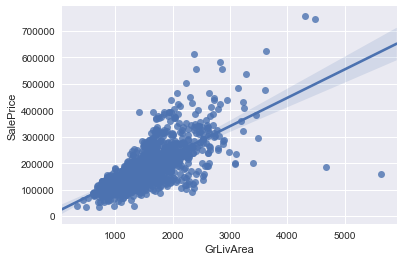

In [88]:
sns.regplot(train['GrLivArea'], train['SalePrice'])

In [89]:
train[train.GrLivArea>4500][['GrLivArea','SalePrice','Id']]
train = train.drop(train[train['Id']==524].index)
train = train.drop(train[train['Id']==1299].index)

In [90]:
train.shape

(1458, 70)

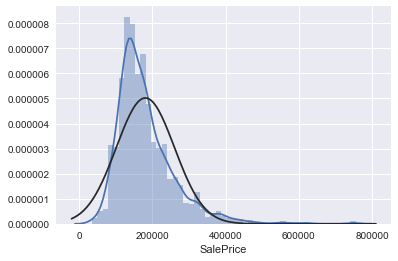

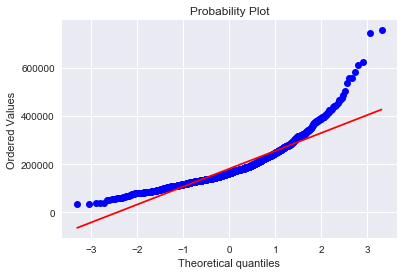

In [91]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [92]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

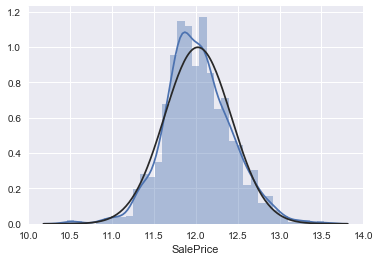

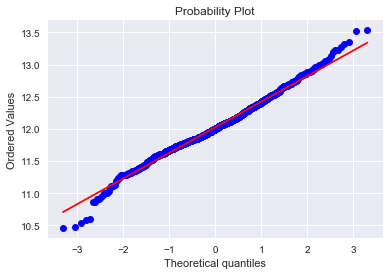

In [93]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [94]:
#convert categorical variable into dummy
train_d = pd.get_dummies(train)

In [95]:
#Percentage of missing values in descending order
miss = (test[miss_cols_test].isnull().sum()/len(test)).sort_values(ascending=False)
print(miss)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
dtype: float64


In [96]:
test.drop(drop_cols, axis=1, inplace=True)

In [97]:
#Imputing missing values 
col_to_impute = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

test[col_to_impute] = test[col_to_impute].fillna('NA')

In [98]:
test[test.columns[test.isnull().any()]].dtypes

MSZoning         object
Utilities        object
Exterior1st      object
Exterior2nd      object
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
GarageCars      float64
SaleType         object
dtype: object

In [99]:
for col in test[test.columns[test.isnull().any()]].columns:
    if(test[col].dtype == 'float64'):
        test[col].fillna(0,inplace=True)
    elif(test[col].dtype == 'object'):
        test[col].fillna('NA',inplace=True)

In [100]:
# Concatenating Train and Test data and converting to dummy variables
len_train=len(train)
data_concat = pd.concat(objs=[train,test], axis=0)
dummy_data = pd.get_dummies(data_concat)
train_d = dummy_data[:len_train].copy()
test_d = dummy_data[len_train:].copy()

In [101]:
print(dummy_data.shape)
print(train_d.shape)

(2917, 282)
(1458, 282)


In [102]:
X_train = train_d.drop('SalePrice', axis=1)
Y_train = train['SalePrice']
X_test = test_d.drop('SalePrice', axis=1)

In [103]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [104]:
lasso_model = Lasso(alpha=0.001, max_iter=50000)
lasso_model.fit(X_train,Y_train)
Y_test = lasso_model.predict(X_test)
Y_test_exp = np.exp(Y_test)
pred = lasso_model.predict(X_train)
lasso_model.score(X_train,Y_train)
np.sqrt(mean_squared_error(pred,Y_train))

0.10533383427302431

In [105]:
result = pd.DataFrame({'Id': test['Id'], 'SalePrice': Y_test_exp})
result.to_csv('lasso_model.csv', header=True, index=False)